HELP International is an international humanitarian NGO that is committed tofighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. After the recent project that included a lot of awareness drives and funding programmes, they have been able to raise around $ 10 million. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. How will you help this NGO to make a correct decision based on socioeconomic and health factors?

#### Import the libraries

In [1]:
#importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Load the dataset

In [2]:
#reading data
df=pd.read_csv(r"C:\Users\rakhi\Downloads\Country-data.csv")
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [3]:
df.shape

(167, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

#### Check for null values

In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values.

#### Duplicates check

In [7]:
df.duplicated().any()

False

There are no duplicate values.

In [8]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [9]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [10]:
df1=df.drop("country",axis=1)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


#### Data Visualization

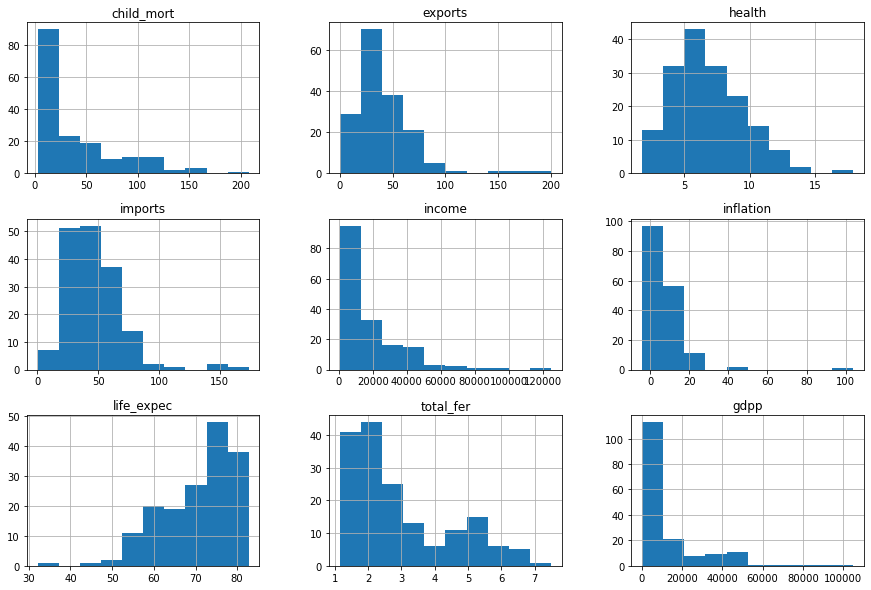

In [11]:
#distribution
df.hist(figsize =(15,10))
plt.show()

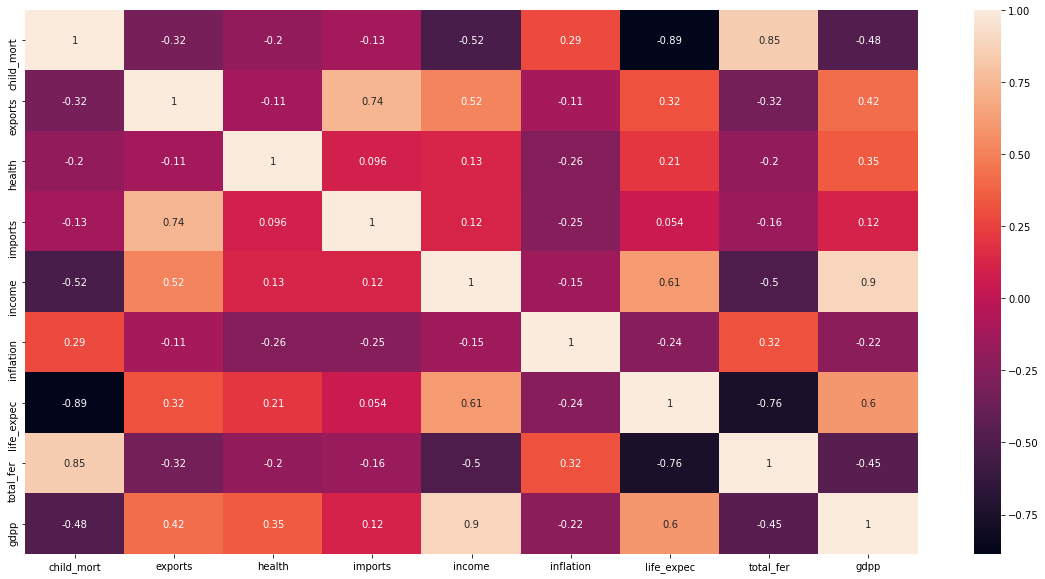

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(df1.corr(),annot = True)
plt.show()

From above we can conclude that:
1. gdpp and income,imports and exports,child_mort and total_fert are highly positive correlated
2. whereas life_expec and child_mort are highly negative correlated

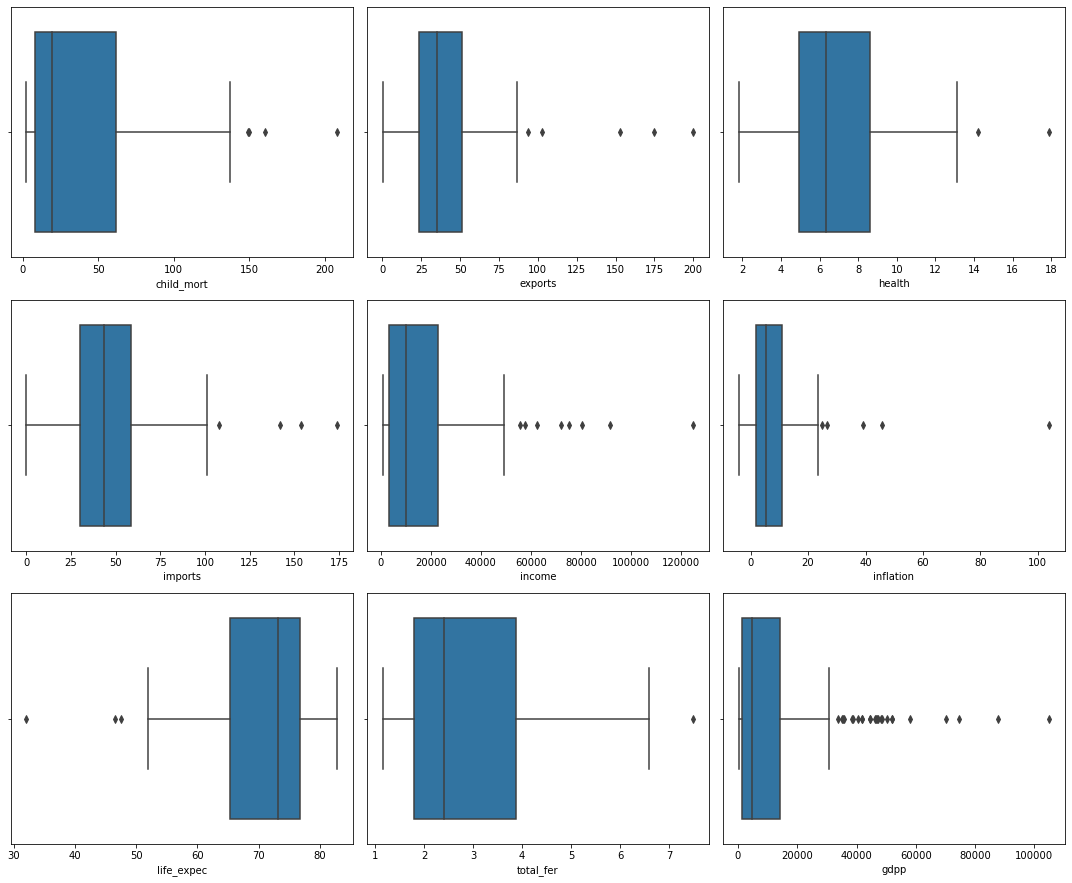

In [13]:
col=df1.columns
plt.figure(figsize=(15,16))
for i, j in enumerate(col):
    plt.subplot(4,3, i+1)
    sns.boxplot(df[j])
plt.tight_layout()

* From above box-plots, we can see that there are so many outliers in our dataset.
* Most of the outliers are in income and gdpp.
* Except for Life Ecpectancy, all the boxplot have outliers only on the upper end.
* GDPP has a lot of positive outliers.
* Inflation has few outliers but, one has very high value which will affect the distribution.

Outliers wont be tampered with as they may contain genuine insight about the countries.

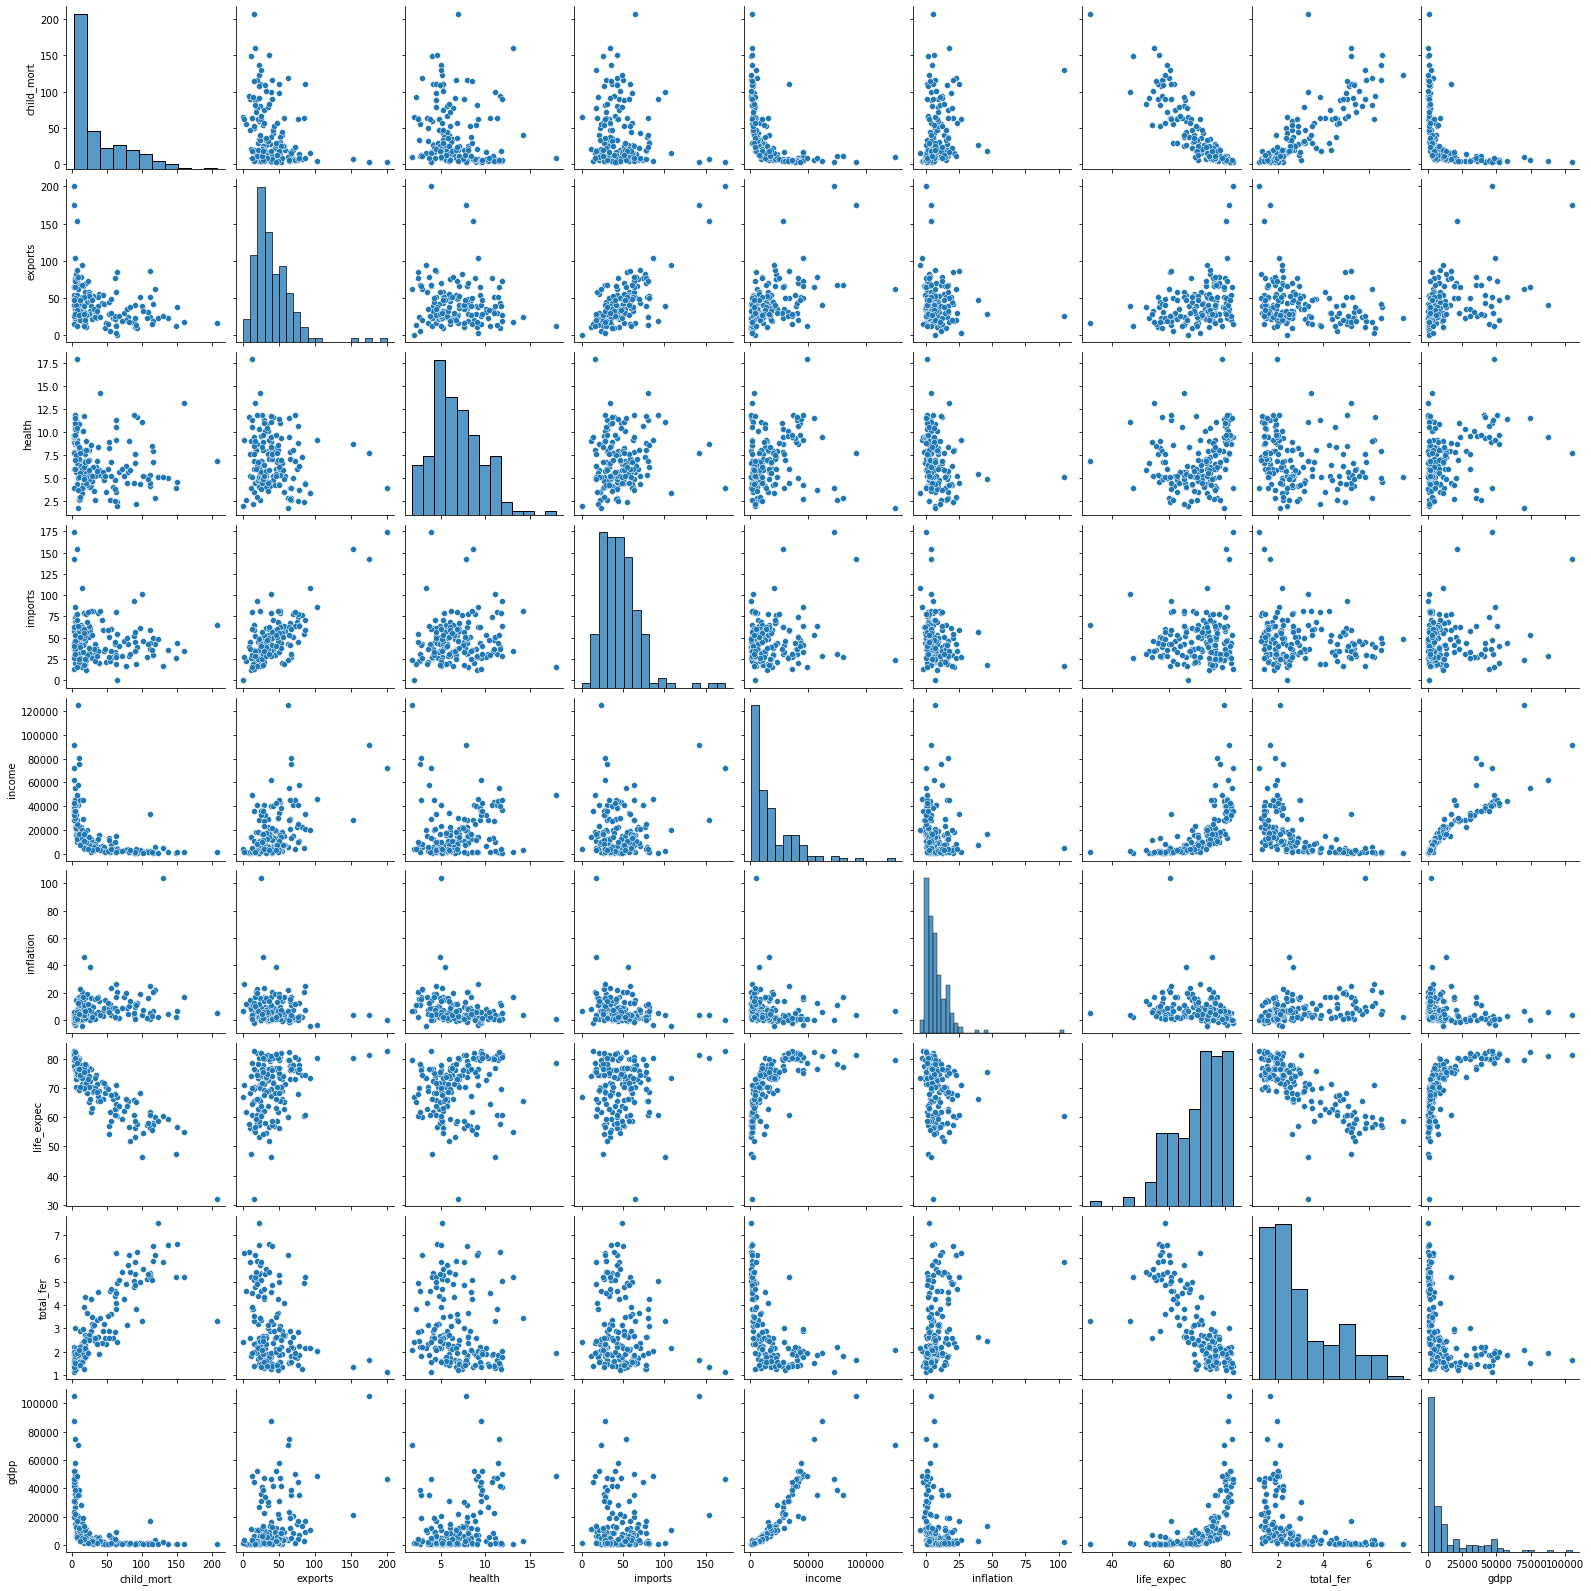

In [14]:
sns.pairplot(df)

### Scaling data

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df1)

In [16]:
sdf = pd.DataFrame(x, columns = df1.columns) # Scaled Data
sdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,-2.659217e-17,1.003008,-0.887138,-0.746619,-0.471798,0.592667,4.221297
exports,167.0,2.383323e-16,1.003008,-1.500192,-0.633337,-0.223528,0.374720,5.813835
health,167.0,5.218713e-16,1.003008,-1.827827,-0.692211,-0.181001,0.651541,4.047436
imports,167.0,2.871954e-16,1.003008,-1.939940,-0.691479,-0.148743,0.491353,5.266181
income,167.0,-7.512288e-17,1.003008,-0.860326,-0.717456,-0.373808,0.294237,5.611542
inflation,167.0,8.376533e-17,1.003008,-1.137852,-0.566641,-0.226950,0.281636,9.129718
life_expec,167.0,3.616535e-16,1.003008,-4.337186,-0.592758,0.286958,0.704258,1.380962
total_fer,167.0,3.124580e-16,1.003008,-1.191250,-0.763902,-0.356431,0.617525,3.009349
gdpp,167.0,2.127373e-17,1.003008,-0.696801,-0.636660,-0.454431,0.059421,5.036507


### K-Means Clustering

To decide the number of clusters, we are going to use elbow method

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i , init = "k-means++", random_state = 21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

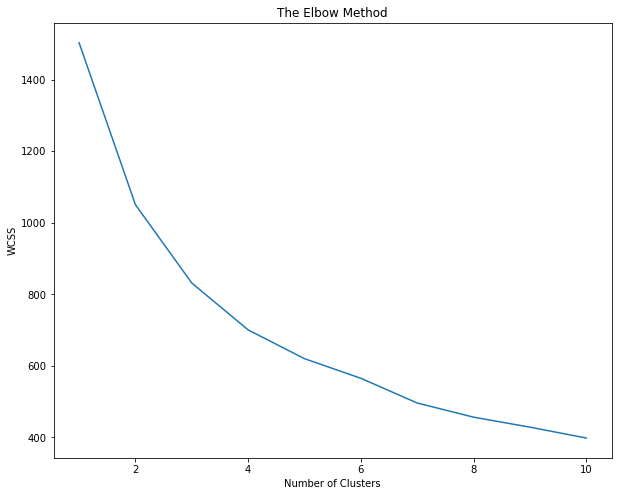

In [18]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

#### Silhouette Validation

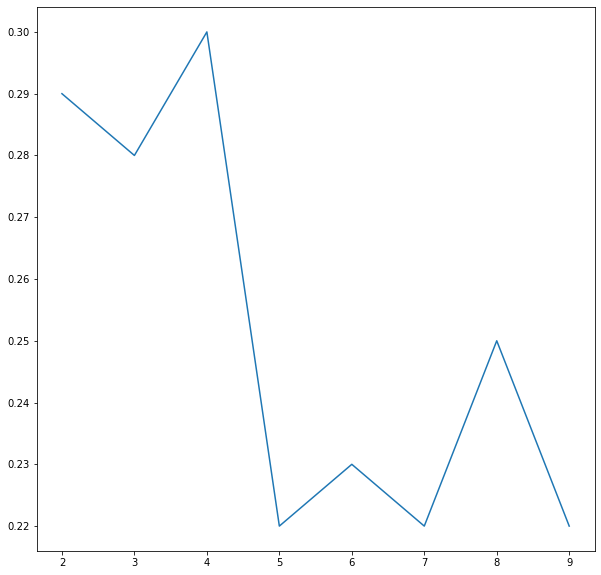

In [19]:
from sklearn.metrics import silhouette_score
score=[]
plt.figure(figsize=(10,10))
for i in range(2,10):
    k=KMeans(i)
    k.fit(x)
    score.append(np.round(silhouette_score(x,k.labels_),2))
plt.plot(range(2,10),score)
plt.show()

Here we can see 4 gives the highest score, so we go for k=4.

In [20]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
cluster_labels = kmeans.fit_predict(x)

In [21]:
print(cluster_labels)

[0 1 1 0 1 1 1 3 3 1 1 1 1 1 1 3 1 0 1 1 1 0 1 3 1 0 0 1 0 3 1 0 0 1 1 1 0
 0 0 1 0 1 3 1 3 1 1 1 1 0 0 1 1 3 3 0 0 1 3 0 3 1 1 0 0 1 0 1 3 1 1 1 0 3
 3 3 1 3 1 1 0 0 3 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 3
 3 0 0 3 1 0 1 1 1 1 1 3 3 1 1 0 1 1 0 1 1 0 2 1 3 1 0 3 3 1 1 0 1 3 3 1 0
 1 0 0 1 1 1 1 0 1 3 3 3 1 1 1 1 1 0 0]


In [22]:
df1["cluster"] = cluster_labels
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [23]:
df1.groupby('cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333


* Cluster No 0 has high child mortality rate, low gdp per capita, low income per person and low life expectancy.
* Cluster No 1 has medium child mortality rate, medium gdp per capita, medium income per person and medium life expectancy.
* Cluster No 3 has lower child mortality rate, higher gdp per capita, higher income per person and higher life expectancy.
* Cluster No 2 has lowest child mortality rate, highest gdp per capita, highest income per person and highest life expectancy.

So here we conclude that
* 0 = first priority country
* 1= second priority country
* 3 = third priority country
* 2 = fourth priority country

CEO should target countries in cluster 0 and 1 initially which are in dire need.

In [24]:
first_priority=df[df1["cluster"]==0]["country"]
print("Number of first_priority countries = ",len(first_priority))
second_priority=df[df1["cluster"]==1]["country"]
print("Number of second_priority countries = ",len(second_priority))
third_priority=df[df1["cluster"]==3]["country"]
print("Number of third_priority countries = ",len(third_priority))
fourth_priority=df[df1["cluster"]==2]["country"]
print("Number of fourth_priority countries = ",len(fourth_priority))

Number of first_priority countries =  47
Number of second_priority countries =  87
Number of third_priority countries =  30
Number of fourth_priority countries =  3


### Hierarchical Clustering

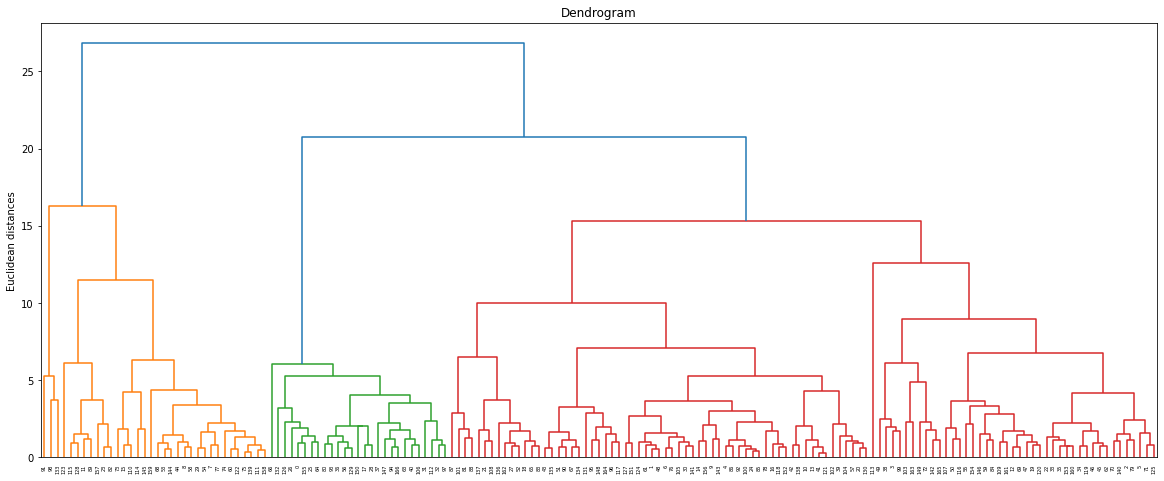

In [25]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,8))
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title("Dendrogram")
plt.ylabel("Euclidean distances")
plt.show()

#### Silhouette Validation

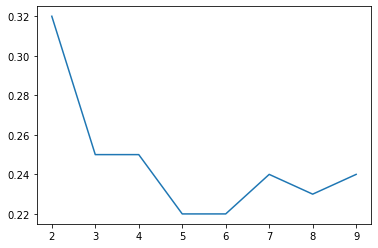

In [26]:
from sklearn.cluster import AgglomerativeClustering
score=[]
for i in range(2,10):
    hc=AgglomerativeClustering(i)
    hc.fit(x)
    score.append(np.round(silhouette_score(x,hc.labels_),2))
plt.plot(range(2,10),score)
plt.show()

The optimum number of clusters is 2.

In [27]:
from sklearn.cluster import AgglomerativeClustering
res = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
lab = res.fit_predict(x)
print(lab)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


In [28]:
df1["agg_cluster"] = lab
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,agg_cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,0


In [29]:
df1.groupby('agg_cluster').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
agg_cluster,,,,,,,,,,
0,46.529323,36.660895,6.384812,46.375683,9362.127820,8.71909,68.145865,3.218797,5242.210526,0.691729
1,5.961765,58.508824,8.501176,48.902941,47588.235294,4.11550,79.982353,1.888529,43170.588235,2.676471


* Cluster No 0 has high child mortality rate, low gdp per capita, low income per person and low life expectancy.
* Cluster No 1 has low child mortality rate, high gdp per capita, high income per person and high life expectancy.

So here we conclude that

* 0 = first priority countries
* 1 = second priority countries

CEO should target countries in cluster 0 with first priority.

In [30]:
first_priority=df[df1["agg_cluster"]==0]["country"]
print("Number of first priority countries = ",len(first_priority))
second_priority=df[df1["cluster"]==1]["country"]
print("Number of second_priority countries = ",len(second_priority))

Number of first priority countries =  133
Number of second_priority countries =  87


#### Conclusion

K means

In [31]:
def func(x):
    if x==0:
        return "first-help needed country" 
    elif x==1:
        return "second-help needed country"
    elif x==3:
        return "Third-help needed country"
    else:
        return "Fourth Help needed country"
df1["kmeans-cluster"]=df1["cluster"].map(lambda x: func(x))
df1.drop("cluster",axis=1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,agg_cluster,kmeans-cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,first-help needed country
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,second-help needed country
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,second-help needed country
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,first-help needed country
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,second-help needed country
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,second-help needed country
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,second-help needed country
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,second-help needed country
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,first-help needed country


Hierarchical Clustering

In [32]:
def func(x):
    if x==0:
        return "first-help needed country"
    else:
        return "second-help needed country"
df1["hierarchical_cluster"]=df1["agg_cluster"].map(lambda x: func(x))
df1.drop("agg_cluster",axis=1)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,kmeans-cluster,hierarchical_cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,first-help needed country,first-help needed country
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,second-help needed country,first-help needed country
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,second-help needed country,first-help needed country
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,first-help needed country,first-help needed country
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1,second-help needed country,first-help needed country
...,...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1,second-help needed country,first-help needed country
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1,second-help needed country,first-help needed country
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1,second-help needed country,first-help needed country
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,first-help needed country,first-help needed country
